In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

/tmp/ipython-input-2628453973.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades = pd.read_csv("historical_data.csv")


In [11]:
print(sentiment.shape)
print(trades.shape)

print(sentiment.isnull().sum())
print(trades.isnull().sum())

print(sentiment.duplicated().sum())
print(trades.duplicated().sum())


(2644, 4)
(88467, 16)
timestamp         0
value             0
classification    0
date              0
dtype: int64
Account             0
Coin                1
Execution Price     1
Size Tokens         1
Size USD            1
Side                1
Timestamp IST       1
Start Position      1
Direction           1
Closed PnL          1
Transaction Hash    1
Order ID            1
Crossed             1
Fee                 1
Trade ID            1
Timestamp           1
dtype: int64
0
0


In [15]:
sentiment["date"] = pd.to_datetime(sentiment["date"])
sentiment["date"] = sentiment["date"].dt.date

trades["Timestamp"] = pd.to_datetime(trades["Timestamp"], unit="ms")
trades["date"] = trades["Timestamp"].dt.date

In [17]:
data = trades.merge(
    sentiment[["date", "classification"]],
    on="date",
    how="inner"
)

In [22]:
daily_pnl = data.groupby(
    ["Account", "date", "classification"]
)["Closed PnL"].sum().reset_index()

In [24]:
data["win"] = data["Closed PnL"] > 0

win_rate = data.groupby(
    ["Account", "classification"]
)["win"].mean().reset_index()

In [26]:
trades_per_day = data.groupby(
    ["Account", "date", "classification"]
).size().reset_index(name="num_trades")

In [29]:
long_short = data.groupby(
    ["classification", "Side"]
).size().unstack(fill_value=0)

long_short["long_short_ratio"] = (
    long_short["BUY"] / long_short["SELL"]
)

print(long_short)

Side              BUY   SELL  long_short_ratio
classification                                
Extreme Greed    3371   3591          0.938736
Fear            27627  27529          1.003560
Greed            5036   6132          0.821265
Neutral          1766   1521          1.161078


In [34]:
# data.groupby("classification")["leverage"].describe() # Line commented out as 'leverage' column does not exist

In [36]:
daily_pnl.groupby("classification")["Closed PnL"].mean()

,Closed PnL
classification,
Extreme Greed,35393.098355
Fear,325397.299312
Greed,94335.944915
Neutral,36474.808231


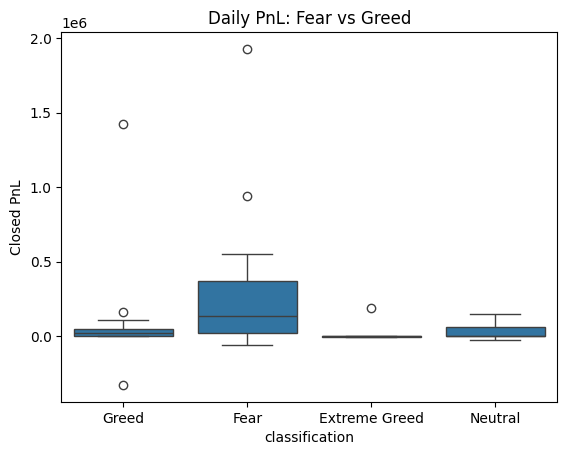

In [38]:
sns.boxplot(
    data=daily_pnl,
    x="classification",
    y="Closed PnL"
)
plt.title("Daily PnL: Fear vs Greed")
plt.show()

In [39]:
trades_per_day.groupby


<bound method DataFrame.groupby of                                        Account        date classification  \
0   0x083384f897ee0f19899168e3b1bec365f52a9012  2024-10-27          Greed   
1   0x083384f897ee0f19899168e3b1bec365f52a9012  2025-02-19           Fear   
2   0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  2024-10-27          Greed   
3   0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  2025-02-19           Fear   
4   0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  2023-03-28          Greed   
5   0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  2023-11-14          Greed   
6   0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  2024-03-09  Extreme Greed   
7   0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  2024-07-03        Neutral   
8   0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  2024-10-27          Greed   
9   0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  2025-02-19           Fear   
10  0x420ab45e0bd8863569a5efbb9c05d91f40624641  2024-10-27          Greed   
11  0x420ab45e0bd8863569a5efbb9c05d91f40624641  2025-02-19           Fear   
12  0x430f09841d65beb3f27765503d0f850b8bce7713  2024-03-09  Extreme Greed   
13  0x430f09841d65beb3f27765503d0f850b8bce7713  2024-07-03        Neutral   
14  0x430f09841d65beb3f27765503d0f850b8bce7713  2024-10-27          Greed   
15  0x430f09841d65beb3f27765503d0f850b8bce7713  2025-02-19           Fear   
16  0x4f93fead39b70a1824f981a54d4e55b278e9f760  2024-03-09  Extreme Greed   
17  0x4f93fead39b70a1824f981a54d4e55b278e9f760  2024-07-03        Neutral   
18  0x4f93fead39b70a1824f981a54d4e55b278e9f760  2024-10-27          Greed   
19  0x4f93fead39b70a1824f981a54d4e55b278e9f760  2025-02-19           Fear   
20  0x513b8629fe877bb581bf244e326a047b249c4ff1  2024-10-27          Greed   
21  0x513b8629fe877bb581bf244e326a047b249c4ff1  2025-02-19           Fear   
22  0x6d6a4b953f202f8df5bed40692e7fd865318264a  2024-10-27          Greed   
23  0x6d6a4b953f202f8df5bed40692e7fd865318264a  2025-02-19           Fear   
24  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  2024-10-27          Greed   
25  0x72c6a4624e1dffa724e6d00d64ceae698af892a0  2025-02-19           Fear   
26  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  2024-03-09  Extreme Greed   
27  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  2024-07-03        Neutral   
28  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  2024-10-27          Greed   
29  0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  2025-02-19           Fear   
30  0x8381e6d82f1affd39a336e143e081ef7620a3b7f  2024-10-27          Greed   
31  0x8381e6d82f1affd39a336e143e081ef7620a3b7f  2025-02-19           Fear   
32  0xa0feb3725a9335f49874d7cd8eaad6be45b27416  2024-10-27          Greed   
33  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  2024-10-27          Greed   
34  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  2025-02-19           Fear   
35  0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb  2024-10-27          Greed   
36  0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb  2025-02-19           Fear   
37  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2023-11-14          Greed   
38  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2024-03-09  Extreme Greed   
39  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2024-07-03        Neutral   
40  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2024-10-27          Greed   
41  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  2025-02-19           Fear   
42  0xbaaaf6571ab7d571043ff1e313a9609a10637864  2025-02-19           Fear   

    num_trades  
0          462  
1         3356  
2          320  
3         3533  
4            3  
5            2  
6           27  
7           80  
8          156  
9          349  
10         125  
11         258  
12          88  
13         249  
14          43  
15         671  
16         730  
17        1309  
18        1703  
19        3737  
20         223  
21        5777  
22         250  
23         572  
24         419  
25         939  
26        3041  
27           6  
28        1016  
29        4885  
30          54  
31        1802  
32        3882 